In [195]:
# dropando colunas ficou bom
# nao precisando dropar ficou melhor
# randomsearch ajudou
# DROP: 'DS'
# ANTES: 625 -> 500

In [196]:
# imports
import pandas as pd
import numpy as np
from dateutil import parser

In [197]:
# configs
import warnings
warnings.filterwarnings("ignore")

In [198]:
# read csvs & build dataframe
df = pd.read_csv('./datasets/2_dados_correlacionados.csv', ',')
pd.set_option('display.max_rows', 50)

In [199]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

import mpld3
import matplotlib.style as style
import matplotlib.pyplot as plt
mpld3.enable_notebook()

import eli5
from eli5.sklearn import PermutationImportance

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# featured engineering
X = df.drop(columns=['DATA', 'VENDAS', 'DS'])
y = df.drop(columns=['DATA', 'FDS', 'DS', 'DATA_FESTIVA', 'VESPERA_DATA_FESTIVA', 'POS_DATA_FESTIVA', 'DATA_NAO_FESTIVA', 'FERIADO', 'NAO_FERIADO', 'SEMANA_PAGAMENTO', 'SEMANA_DE_NAO_PAGAMENTO', 'BAIXA_TEMPORADA', 'ALTA_TEMPORADA', 'QTD_CONCORRENTES', 'PRECIPITACAO', 'TEMPERATURA', 'UMIDADE'])

# shuffled and splitted into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

# feature scaling
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

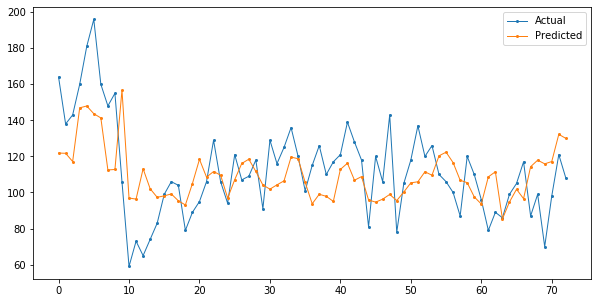

MSE: 500.84142958329966
Explained Variance Regression: 0.2686972708267401
Max Error: 52.30122344360933
MAE: 18.56888585370163


Weight,Feature
0.2572 ± 0.1817,VESPERA_DATA_FESTIVA
0.2236 ± 0.0499,ALTA_TEMPORADA
0.1416 ± 0.1018,BAIXA_TEMPORADA
0.0825 ± 0.0733,DATA_NAO_FESTIVA
0.0545 ± 0.1153,SEMANA_PAGAMENTO
0.0400 ± 0.0560,SEMANA_DE_NAO_PAGAMENTO
0.0291 ± 0.0309,PRECIPITACAO
0.0280 ± 0.0536,TEMPERATURA
0.0048 ± 0.0146,QTD_CONCORRENTES
0 ± 0.0000,NAO_FERIADO


In [200]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score

nn = MLPRegressor(random_state=2, solver='sgd', activation='relu', learning_rate='adaptive', hidden_layer_sizes=17, max_iter=500, early_stopping=True)
nn.fit(X_train, y_train)
y_pred = nn.predict(X_test)
scores = cross_val_score(nn, X_test, y_test, cv=10)
df1 = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred.flatten()})
df1.plot(kind='line', figsize=(10, 5), linestyle='solid', linewidth=1, markersize=2, style="-o")
plt.show()

print(f'MSE: {metrics.mean_squared_error(y_test, y_pred)}')
print(f'Explained Variance Regression: {metrics.explained_variance_score(y_test, y_pred)}')
print(f'Max Error: {metrics.max_error(y_test, y_pred)}')
print(f'MAE: {metrics.mean_absolute_error(y_test, y_pred)}')

perm = PermutationImportance(nn, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names=X.columns.values.tolist())

In [201]:
# # random saearch
# from scipy.stats import randint as sp_randint

# params = {
#     'solver': ['sgd'],
#     'activation': ['identity', 'logistic', 'tanh', 'relu'],
#     'learning_rate': ['constant', 'invscaling', 'adaptive'],
#     'early_stopping': [True],
#     'max_iter': [5000, 6000, 7000, 8000, 10000],
#     'random_state': [0,1,2]
# }

# search_obj = RandomizedSearchCV(MLPRegressor(), param_distributions=params)
# fit_obj = search_obj.fit(X_train, y_train)
# print(fit_obj.best_estimator_)

# # modeling
# b_model = fit_obj.best_estimator_
# b_model.fit(X_train, y_train)
# b_y_pred = b_model.predict(X_test)
# b_y_pred
# df2 = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': b_y_pred.flatten()})
# df2.plot(kind='line', figsize=(10, 5), linestyle='solid', linewidth=1, markersize=2, style="-o")
# plt.show()

# # printing first metrics
# print(f'RMSE: {metrics.mean_squared_error(y_test, b_y_pred, squared=True)}')